In [1]:
def plot_digit(x,idx):
    some_digit=x[idx,:,:]
    some_digit=some_digit.reshape(28,28)
    import matplotlib.pyplot as plt
    plt.imshow(some_digit,cmap=plt.get_cmap("binary"))

In [2]:
#Data Retrival
import idx2numpy
import numpy as np
file="t10k-images-idx3-ubyte"
x_test=idx2numpy.convert_from_file(file)
file="t10k-labels.idx1-ubyte"
y_test=idx2numpy.convert_from_file(file)
file="train-images-idx3-ubyte"
x_train_val=idx2numpy.convert_from_file(file)
file="train-labels-idx1-ubyte"
y_train_val=idx2numpy.convert_from_file(file)

test_fold=np.zeros((60000,1))
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=10000)
for train_index,test_index in sss.split(x_train_val,y_train_val):
    x_train,y_train=x_train_val[train_index],y_train_val[train_index]
    x_val,y_val=x_train_val[test_index],y_train_val[test_index]
    test_fold[train_index]=-1 
    test_fold[test_index]=0
print("Training Set   ",x_train.shape,y_train.shape)
print("Validation Set ",x_val.shape,y_val.shape)
print("Test Set       ",x_test.shape,y_test.shape)

x_train=x_train.reshape(50000,784)
x_val=x_val.reshape(10000,784)
x_test=x_test.reshape(10000,784)
x_train_val=x_train_val.reshape(60000,784)

from sklearn.preprocessing import StandardScaler
scal=StandardScaler()


Training Set    (50000, 28, 28) (50000,)
Validation Set  (10000, 28, 28) (10000,)
Test Set        (10000, 28, 28) (10000,)


In [3]:
scal.fit(x_train)
x_train=scal.transform(x_train)
x_val=scal.transform(x_val)
x_test=scal.transform(x_test)
x_train_val=scal.transform(x_train_val)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

ps=PredefinedSplit(test_fold)

In [5]:
rfc=RandomForestClassifier(n_jobs=-1,warm_start=True)
n_est_linspace=11
max_depth_linspace=6
param_grid_rfc={'n_estimators':np.linspace(1,1000,n_est_linspace).astype(int),'max_depth':np.linspace(1,25,max_depth_linspace).astype(np.int)}
gscv_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid_rfc,scoring="accuracy",n_jobs=-1,verbose=10,cv=ps)

In [6]:
gscv_rfc.fit(x_train_val,y_train_val)
print(gscv_rfc.best_score_)
print(gscv_rfc.best_params_)

Fitting 1 folds for each of 66 candidates, totalling 66 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.5min
/home/psr/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done  58 out of  66 | elapsed: 36.5min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed: 45.1min finished


0.9718
{'max_depth': 25, 'n_estimators': 600}


In [13]:
scores=[]
for score in gscv_rfc.cv_results_["split0_test_score"]:
    scores=np.append(scores,score)
x_estimators=[]
for estimators in gscv_rfc.cv_results_["param_n_estimators"]:
    x_estimators=np.append(x_estimators,estimators)
y_depths=[]
for depth in gscv_rfc.cv_results_["param_max_depth"]:
    y_depths=np.append(y_depths,depth)

In [14]:
x_estimators_graph=x_estimators.reshape(max_depth_linspace,n_est_linspace)
scores_graph_x=scores.reshape(max_depth_linspace,n_est_linspace)
scores_graph_y=scores.reshape(n_est_linspace,max_depth_linspace,order='F')
y_depths_graph=y_depths.reshape(n_est_linspace,max_depth_linspace,order='F')

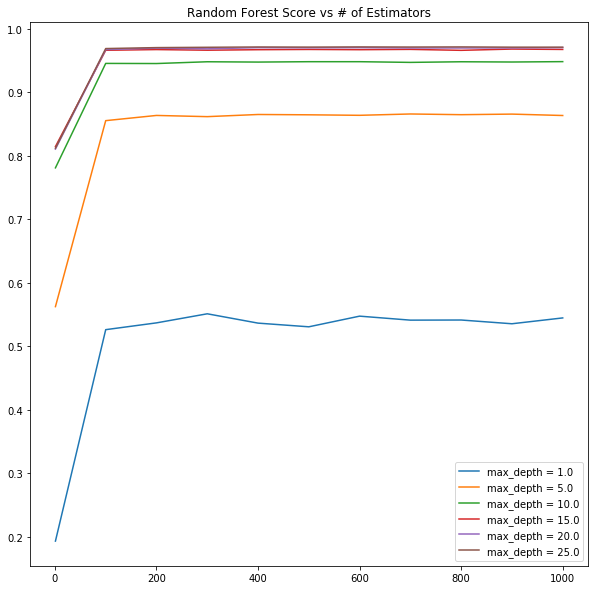

In [15]:
for i in range(max_depth_linspace):
    
    plt.plot(x_estimators_graph[i,:],scores_graph_x[i,:],label="max_depth = "+y_depths_graph[0,i].astype(str))
    plt.legend()
    plt.title("Random Forest Score vs # of Estimators")
    plt.rcParams["figure.figsize"] = (10,10)
    plt.savefig('rf_Score_Estimators.png', bbox_inches='tight')

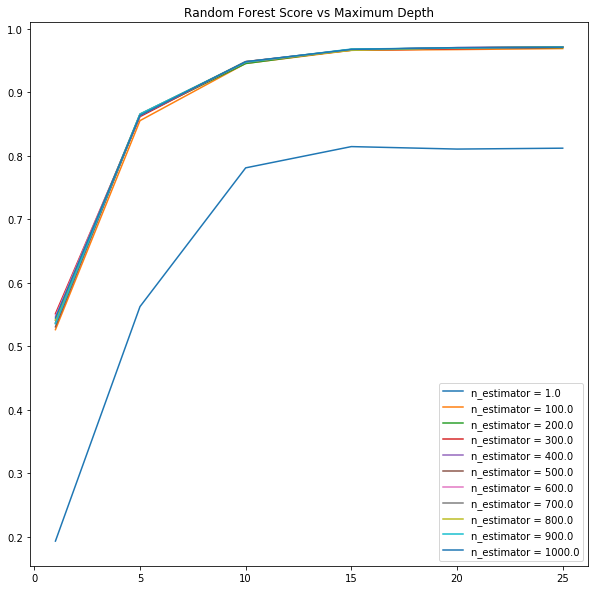

In [16]:

for i in range(n_est_linspace):
    
    plt.plot(y_depths_graph[i,:],scores_graph_y[i,:],label="n_estimator = "+x_estimators_graph[0,i].astype(str))
    plt.legend()
    plt.title("Random Forest Score vs Maximum Depth")
    plt.rcParams["figure.figsize"] = (10,10)
    plt.savefig('rf_Score_MaxDepth.png', bbox_inches='tight')
   


In [17]:
data=gscv_rfc.cv_results_

In [18]:
np.save("rf_data.npy",data)

In [20]:
x_estimators_graph

array([[   1.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.],
       [   1.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.],
       [   1.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.],
       [   1.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.],
       [   1.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.],
       [   1.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]])

In [19]:
scores_graph_x

array([[0.193 , 0.5262, 0.5369, 0.5512, 0.5365, 0.5307, 0.5475, 0.5412,
        0.5414, 0.5355, 0.5447],
       [0.5625, 0.8556, 0.8638, 0.8619, 0.8653, 0.8648, 0.864 , 0.8661,
        0.865 , 0.8659, 0.8637],
       [0.7812, 0.9458, 0.9456, 0.9484, 0.9479, 0.9485, 0.9485, 0.9474,
        0.9484, 0.948 , 0.9486],
       [0.8147, 0.9665, 0.9676, 0.9666, 0.9674, 0.9678, 0.9674, 0.9679,
        0.9664, 0.9684, 0.9678],
       [0.8108, 0.9676, 0.9698, 0.9688, 0.9706, 0.9704, 0.9706, 0.9701,
        0.9701, 0.9702, 0.9707],
       [0.8122, 0.9692, 0.9707, 0.9712, 0.9717, 0.9715, 0.9718, 0.9716,
        0.9718, 0.9714, 0.9714]])

In [21]:
np.transpose(y_depths_graph)

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.],
       [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.],
       [25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.]])

In [ ]:
{'max_depth': 15, 'n_estimators': 200}